<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import unittest

Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [41]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''

    return np.add.reduce(np.matmul(X, V))

class TestSumProd(unittest.TestCase):
    def test_not_zero_matrix_and_not_zero_vectors(self):
        X = [
            np.array([[1, 2], [3, 4]]),
            np.array([[5, 6], [7, 8]])
        ]

        V = [
            np.array([[1], [1]]),
            np.array([[2], [2]])
        ]

        self.assertTrue(np.array_equal(sum_prod(X, V), np.array([[25], [37]])))

    def test_zero_matrix_and_not_zero_vectors(self):
        X = [
            np.array([[0, 0], [0, 0]]),
            np.array([[0, 0], [0, 0]])
        ]

        V = [
            np.array([[1], [1]]),
            np.array([[2], [2]])
        ]

        self.assertTrue(np.array_equal(sum_prod(X, V), np.array([[0], [0]])))

    def test_not_zero_matrix_and_zero_vectors(self):
        X = [
            np.array([[1, 2], [3, 4]]),
            np.array([[5, 6], [7, 8]])
        ]

        V = [
            np.array([[0], [0]]),
            np.array([[0], [0]])
        ]

        self.assertTrue(np.array_equal(sum_prod(X, V), np.array([[0], [0]])))
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_not_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_not_zero_vectors) ... ok
test_not_zero_matrix_and_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_zero_vectors) ... ok
test_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_zero_matrix_and_not_zero_vectors) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.017s

OK


Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [43]:
def binarize(M, threshold=0.5):
    M[M<=threshold] = 0
    M[M>threshold] = 1

    return M

class TestBinarize(unittest.TestCase):
    def test_all_zeros(self):
        M = np.array([[1.12, 1.65], [2.08, 2.1]])
        self.assertTrue(np.array_equal(binarize(M, 3), np.zeros((2, 2))))

    def test_all_units(self):
        M = np.array([[1.12, 1.65], [2.08, 2.1]])
        self.assertTrue(np.array_equal(binarize(M), np.full((2, 2), 1)))

    def test_some_units(self):
        M = np.array([[1.12, 1.65, 0.12], [2.08, 0.49991, 0.24]])
        self.assertTrue(np.array_equal(binarize(M), np.array([[1, 1, 0], [1, 0, 0]])))

    def test_some_units_with_values_equals_threshold(self):
        M = np.array([[1.12, 0.5, 0.12], [0.5, 0.49991, 0.24]])
        self.assertTrue(np.array_equal(binarize(M), np.array([[1, 0, 0], [0, 0, 0]])))

    def test_some_units_with_values_close_to_threshold(self):
        M = np.array([[0.4999, 1.65, 1.001], [2.08, 1+1e-15, 0.5-1e-15]])
        self.assertTrue(np.array_equal(binarize(M, 1), np.array([[0, 1, 1], [1, 1, 0]])))
        
unittest.main(argv=[''], verbosity=2, exit=False)


test_all_units (__main__.TestBinarize.test_all_units) ... ok
test_all_zeros (__main__.TestBinarize.test_all_zeros) ... ok
test_some_units (__main__.TestBinarize.test_some_units) ... ok
test_some_units_with_values_close_to_threshold (__main__.TestBinarize.test_some_units_with_values_close_to_threshold) ... ok
test_some_units_with_values_equals_threshold (__main__.TestBinarize.test_some_units_with_values_equals_threshold) ... ok
test_not_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_not_zero_vectors) ... ok
test_not_zero_matrix_and_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_zero_vectors) ... ok
test_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_zero_matrix_and_not_zero_vectors) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.037s

OK


Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [76]:
def unique_rows(mat):
    res = []
    for row in mat:
        res.append(list(np.unique(row)))
    
    return res

def unique_columns(mat):
    res = []
    for col in mat.T:
        res.append(list(np.unique(col)))

    return res

class TestUniqueElements(unittest.TestCase):
    def test_normal(self):
        M = np.array([[1, 2, 2, 4], [2, 2, 2, 3], [0, 1, 2, 3]])

        self.assertTrue(unique_rows(M) == [[1, 2, 4], [2, 3], [0, 1, 2, 3]])
        self.assertTrue(unique_columns(M) == [[0, 1, 2], [1, 2], [2], [3, 4]])
    
    def test_one_col(self):
        M = np.array([[1], [2], [3]])

        self.assertTrue(unique_rows(M) == [[1], [2], [3]])
        self.assertTrue(unique_columns(M) == [[1, 2, 3]])

    def test_one_row(self):
        M = np.array([[1, 2, 3]])
        
        self.assertTrue(unique_rows(M) == [[1, 2, 3]])
        self.assertTrue(unique_columns(M) == [[1], [2], [3]])

    def test_same_items_in_row(self):
        M = np.array([[1, 1, 1]])

        self.assertTrue(unique_rows(M) == [[1]])
        self.assertTrue(unique_columns(M) == [[1], [1], [1]])

    def test_same_items_in_cols(self):
        M = np.array([[1], [1], [1]])

        self.assertTrue(unique_rows(M) == [[1], [1], [1]])
        self.assertTrue(unique_columns(M) == [[1]])

unittest.main(argv=[''], verbosity=2, exit=False)

test_all_units (__main__.TestBinarize.test_all_units) ... ok
test_all_zeros (__main__.TestBinarize.test_all_zeros) ... ok
test_some_units (__main__.TestBinarize.test_some_units) ... ok
test_some_units_with_values_close_to_threshold (__main__.TestBinarize.test_some_units_with_values_close_to_threshold) ... ok
test_some_units_with_values_equals_threshold (__main__.TestBinarize.test_some_units_with_values_equals_threshold) ... ok
test_not_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_not_zero_vectors) ... ok
test_not_zero_matrix_and_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_zero_vectors) ... ok
test_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_zero_matrix_and_not_zero_vectors) ... ok
test_normal (__main__.TestUniqueElements.test_normal) ... ok
test_one_col (__main__.TestUniqueElements.test_one_col) ... ok
test_one_row (__main__.TestUniqueElements.test_one_row) ... ok
test_same_items_in_cols (__main__.TestUniqueElements.tes

----------------------------------------------------------------------
Ran 13 tests in 0.036s

OK


Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

0.03641228338837122
1.0277155578291044
-0.07257297253253361
0.9120627413777214
0.09738255136390257
1.0432454876899109
-0.03701754165462348
1.083420684708262
0.06664868439036009
1.099841535443028
-0.029713808872980318
0.9255378722997316
-0.005566989449466845
0.9877791974424519
0.04427698653064881
0.7791674863119656
0.09228766041458843
1.0037524983514194
0.010716630286837059
1.0780177363288646
0.09653950499125181
1.0381504900744947
-0.15139577727504377
1.09226116773611
0.10369049337950523
0.9338883748963926
-0.06496306181568463
1.0251526840857672
0.07940699071701944
1.1049291016471148
0.14157272065307225
1.0681951858553835
0.07832267255387644
1.0034641073933603
-0.10038185665568543
1.0720529546195456
0.006997691187347847
1.0454267496731338
-0.041786136952733324
0.9583829126476571
-0.03335562315089696
1.0172616566206667
0.0410591955777431
0.9036542857916834
-0.11090957377557074
1.1565617944832445
0.0026118897745693453
0.9325816887858442
0.09864289733715777
0.9658147585189791
0.04363655465

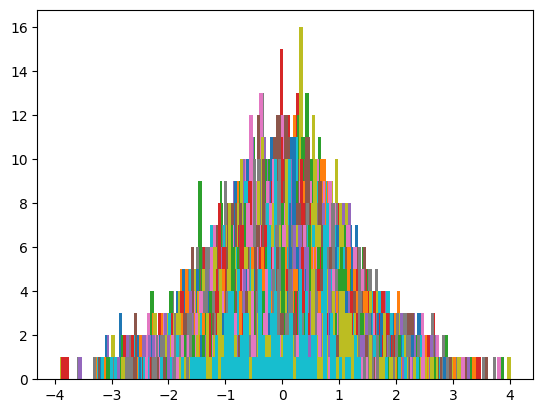

In [139]:
def normal_matrix(m, n):
    M = np.random.normal(0, 1, (m, n))
    for row in M:
        print(np.mean(row))
        print(np.var(row))
        plt.hist(row, bins=100)

    for col in M.T:
        print(np.mean(col))
        print(np.var(col))
        plt.hist(col, bins=100)
    
    return M

print(normal_matrix(100, 250))

Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [ ]:
def chess(m, n, a, b):
    # Your code goes here
    pass

Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:

# $\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

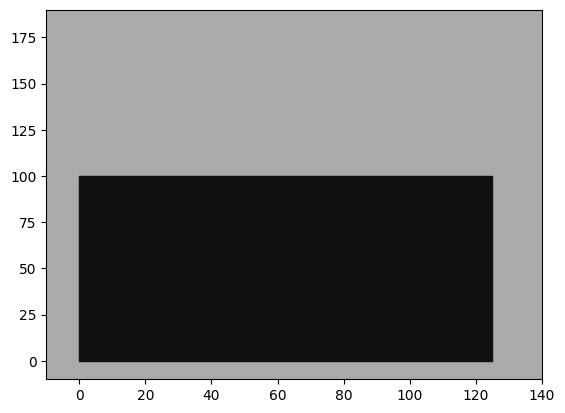

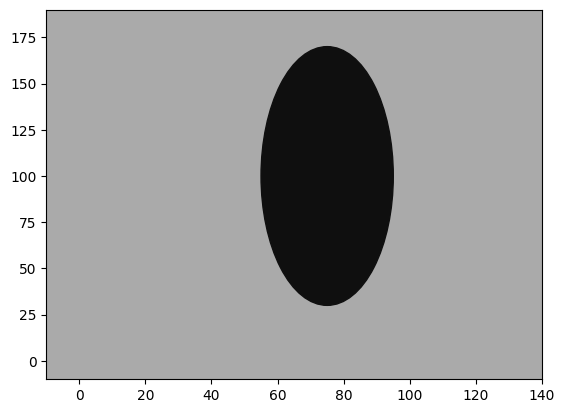

In [90]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rect = matplotlib.patches.Rectangle((0, 0), a, b, color=rectangle_color)
    ax.add_patch(rect)
    ax.set_facecolor(background_color)
    plt.xlim(-10, m - 10)
    plt.ylim(-10, n - 10)
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ellipse = matplotlib.patches.Ellipse((m // 2, n // 2), 2 * a, 2 * b, color=ellipse_color)
    ax.add_patch(ellipse)
    ax.set_facecolor(background_color)
    plt.xlim(-10, m - 10)
    plt.ylim(-10, n - 10)
    plt.show()

draw_rectangle(125, 100, 150, 200, '#0f0f0f', '#aaa')
draw_ellipse(20, 70, 150, 200, '#0f0f0f', '#aaa')


Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [85]:
def time_series_processing(series, p):
    result = []
    result += [series.mean(), series.var(), series.std()]
    
    # локальные экстремумы не нашел

    moving_averages = np.convolve(series[0], np.ones(p), 'valid') / p
    result.append(moving_averages)

    return result

array = np.random.rand(1, 5)
print(time_series_processing(array, 3))

[0.5020324468314322, 0.151054963786369, 0.3886579007126563, array([0.78343887, 0.50346764, 0.36875149])]


Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [80]:
def ohe(array):
    ohe = np.zeros((array.size, array.max() + 1))
    ohe[np.arange(array.size), array] = 1

    return ohe

print(ohe(np.array([0, 2, 3, 0])))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
